# Image Pyramids and Image Blending
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_pyramids/py_pyramids.html#exercises

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.simplefilter('ignore')

import gc

from os import path
import sys
sys.path.append(path.abspath('..'))

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from src.config import DATA_PATH
from src.utils import plot_images

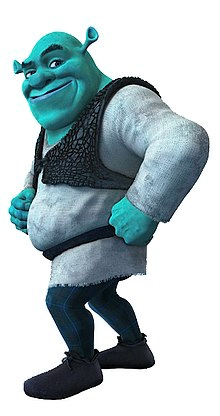

In [4]:
image = cv2.imread(path.join(DATA_PATH, "shrek.jpg"))
Image.fromarray(image)

# Gaussian

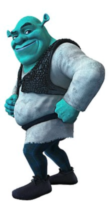

In [9]:
# Pyramid Down
image_down = cv2.pyrDown(image)
Image.fromarray(image_down)

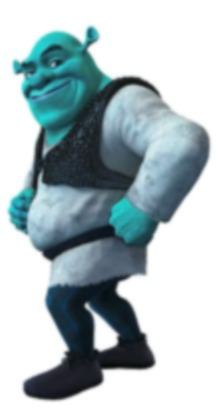

In [10]:
# Pyramid Down Up
image_down = cv2.pyrDown(image)
image_down_up = cv2.pyrUp(image_down)
Image.fromarray(image_down_up)

# [Image Blending](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_pyramids/py_pyramids.html#image-blending-using-pyramids)

In [41]:
# We did not find suitable images for blending)
image1 = cv2.imread(path.join(DATA_PATH, "apple2.jpg"))
image2 = image1.copy()[:, :, ::-1]

In [48]:
def get_gaussian_piramid(image, depth=6):
    image_copy = image.copy()
    pyramid = [image_copy]
    for _ in range(depth):
        image_copy = cv2.pyrDown(image_copy)
        pyramid.append(image_copy)
    return pyramid

def get_laplasian_pyramid(gausian_pyramid):
    laplasian_pyramid = [gausian_pyramid[-1].copy()]
    for i in range(len(gausian_pyramid) - 1, 0, -1):
        ge = cv2.pyrUp(gausian_pyramid[i])
        laplasian_image = cv2.subtract(gausian_pyramid[i - 1], ge)
        laplasian_pyramid.append(laplasian_image)
    return laplasian_pyramid

In [56]:
gaussian_pyramid1 = get_gaussian_piramid(image1)
laplasian_pyramid1 = get_laplasian_pyramid(gaussian_pyramid1)

gaussian_pyramid2 = get_gaussian_piramid(image2)
laplasian_pyramid2 = get_laplasian_pyramid(gaussian_pyramid2)

cat_images = []
for la, lb in zip(laplasian_pyramid1, laplasian_pyramid2):
    rows, cols, _ = la.shape
    ls = np.hstack((la[:,  0: cols // 2], lb[:, cols // 2:]))
    cat_images.append(ls)
    
ls_ = cat_images[0]
for i in range(1, len(cat_images)):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, cat_images[i])

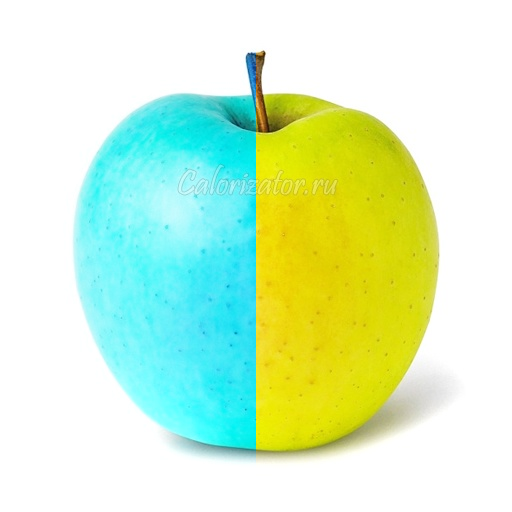

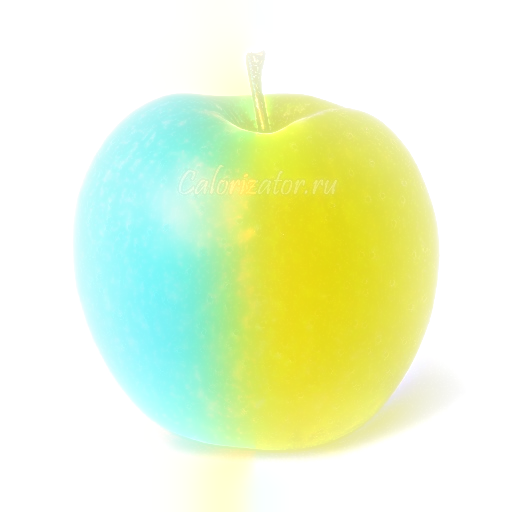

In [59]:
Image.fromarray(np.hstack((image1[:, : cols // 2], image2[:, cols // 2:])))
Image.fromarray(ls_)